### Task 3.1
*Write a program whose input is the training set, a user-specified value of $k$ and an object $\mathbf{x}$. The output is the class label of $\mathbf{x}$.*

In [1]:
import pandas as pd
from math import sqrt
import numpy as np

def distance(row, x):
    d = 0
    for key, value in x.items():
        d += (row[key] - value)**2
    return sqrt(d)
def classify(training_set, k, x):
    distances = []
    i = 0
    for index, row in training_set.iterrows():
        d = distance(row, x)
        distances.append((index, d))
    distances = sorted(distances, key = lambda dist: dist[1])
    nearest_neighbors_indices = [item[0] for item in distances[0:k]]
    nearest_neighbors = training_set.iloc[nearest_neighbors_indices]
    return nearest_neighbors['class'].value_counts().idxmax()
def normalize_each_column(data):
    attributes = list(data.columns.values); attributes.remove('class')
    for attribute in attributes:
        data[attribute]=((data[attribute]-data[attribute].min())
                        /(data[attribute].max()-data[attribute].min()))
    return data

**Test on 'example1.csv'**

In [2]:
data = pd.read_csv('example1.csv')
display(data)
x = pd.DataFrame.from_dict({'at1': [3.1], 'at2': [2], 'at3':[1.99] })

,at1,at2,at3,class
0,3.2,2.1,2.10,pos
1,5.2,6.1,7.50,pos
2,8.5,1.3,0.50,pos
3,2.3,5.4,2.45,neg
4,6.2,3.1,4.40,neg
5,1.3,6.0,3.35,neg


In [3]:
print("The most probable class of x:", classify(data, 1, x))

The most probable class of x: pos


### Task 3.2
*Apply the program implemented in the previous assignment to some of the benchmark domains from the UCI repository.*

**Checking on 'wines'**

In [4]:
data = pd.read_csv('wines.csv')
data = normalize_each_column(data)
display(data.head())
msk = np.random.rand(len(data)) < 0.6
train = ((data.iloc[msk]).reset_index()).drop(columns='index')
display(train.head())
test = ((data.iloc[~msk]).reset_index()).drop(columns='index')
display(test.head())

,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,1,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949


,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
1,1,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
2,1,0.978947,0.195652,0.550802,0.041237,0.228261,0.731034,0.706751,0.566038,0.757098,0.351536,0.626016,0.534799,0.621969
3,1,0.684211,0.211462,0.716578,0.340206,0.456522,0.644828,0.542194,0.320755,0.331230,0.513652,0.650407,0.589744,0.736091
4,1,0.860526,0.233202,0.727273,0.484536,0.543478,0.627586,0.590717,0.377358,0.492114,0.419795,0.479675,0.505495,0.714693


In [5]:
attributes = list(train.columns.values); attributes.remove('class');
x = test[attributes]
display(x.head())

,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280-OD315-of-diluted-wines,proline
0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
1,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
2,0.978947,0.195652,0.550802,0.041237,0.228261,0.731034,0.706751,0.566038,0.757098,0.351536,0.626016,0.534799,0.621969
3,0.684211,0.211462,0.716578,0.340206,0.456522,0.644828,0.542194,0.320755,0.331230,0.513652,0.650407,0.589744,0.736091
4,0.860526,0.233202,0.727273,0.484536,0.543478,0.627586,0.590717,0.377358,0.492114,0.419795,0.479675,0.505495,0.714693


In [6]:
import matplotlib.pyplot as plt
s = []
kVals = [1, 2, 3, 4, 5,6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 70, 90, 110, 130]
for k in kVals:
    success = 0
    fail = 0
    for i in range(len(test)):
        v = x.iloc[i]
        class_v = (test.iloc[i])['class'] 
        result = classify(train, k, v)
        if result == class_v:
            success += 1
        else:
            fail += 1
    s.append(100*success/len(test))

# print("Successes: ","{0:.2f}".format(100*success/len(test)) ,"%")
# print("Fails: ", "{0:.2f}".format(100*fail/len(test)) ,"%")

#### Plot how well it works

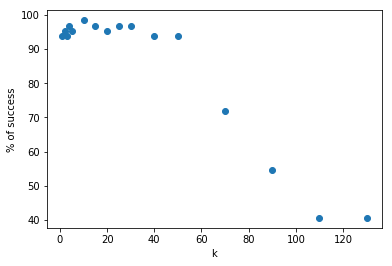

In [7]:
plt.ylabel("% of success")
plt.xlabel("k")
# plt.axis([1, 20, 96.85, 96.9])
plt.plot(kVals, s, 'o')
plt.show()

### Task 3.3

*Create a synthetic toy domain consisting of 1000 examples described by a pair of attributes, each from the interval $[0,1]$. In the square defined by these attribute values, $[0,1] \times [0,1]$, define a geometric figure on your own choice and label all examples inside it as positive and all other examples as negative. From this initial noise-free data set, create 5 files, each obtained by changing $p$ percent of the class labels, using $p \in \{5, 10, 15, 20, 25\}$ (thus obtaining different levels of class-label noise).*

*Divide each data file into two parts, the first to be reclassified by the $k$-NN classifier that uses the second part. Observe how different values of $k$ result in different behaviors under different levels of class-label noise.* 

In [3]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [82]:
# create the coordinates of 1000 points
n = 1000
x = np.random.rand(n)
y = np.random.rand(n)
# label points inside the circle as 'pos' and outside as 'neg'
radius = 0.3
x_0 = 0.5
y_0 = 0.4
classes = np.zeros(shape=n)
for i in range(n):
    if (x[i]-x_0)**2 + (y[i]-y_0)**2 < radius**2:
        classes[i] = 1


In [87]:
#create original + 5 files each with some percent of class labels changed
p = [0, 5, 10, 15, 20, 25]
changed_labels = []
for p_val in p:
    indices_to_change_labels = np.random.randint(n, size = (int(0.01*p_val*n )))
    cl = classes.copy()
    for i in indices_to_change_labels:
        if classes[i] == 0:
            cl[i] = 1
        if classes[i] == 1:
            cl[i] = 0
    changed_labels.append(cl)
    data = {'x': x, 
            'y': y,
            'class': cl}
    pd.DataFrame.from_dict(data).to_csv('3_3_'+str(p_val)+'_percent_changed_labels.csv')

<IPython.core.display.Javascript object>


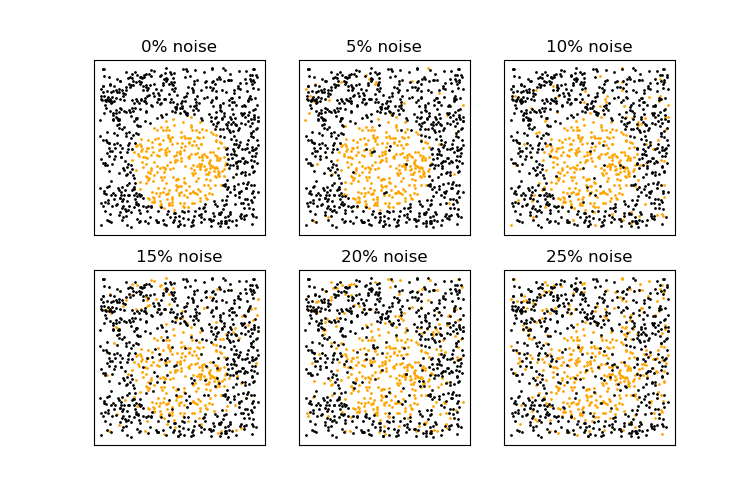

In [86]:
# plot all data
fig, sp = plt.subplots(2,3, sharex = True, sharey=True, figsize = (7.5,5))
pos = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3)]
for i in range(len(changed_labels)):
    x_in = np.ma.masked_where(changed_labels[i] == 1, x)
    y_in = np.ma.masked_where(changed_labels[i] == 1, y)
    x_out = np.ma.masked_where(changed_labels[i] == 0, x)
    y_out = np.ma.masked_where(changed_labels[i] == 0, y)
    pt = sp[pos[i][0]-1, pos[i][1]-1]
    pt.scatter(x_out, y_out,s=1, marker='o', c = 'orange', label = 'pos')     
    pt.scatter(x_in, y_in,s=1, marker='o', c = 'black', label = 'neg')
    pt.set_yticks([])
    pt.set_xticks([])
    pt.axis('equal')
    pt.set_title(str(p[i]) + '% noise')
plt.show()